Nama: Satria Wicaksana
NIM: G6501222047

Resolusi: (750, 500) Total pixels: 375000


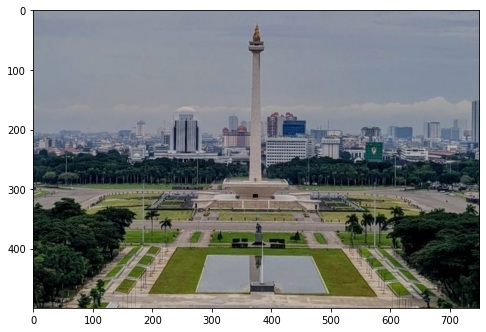

In [35]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

image = Image.open(r'C:\Users\HipponaX\OneDrive\Documents\New folder\monas.jpg')
X = np.mean(image, -1)

width, height = image.size
totpix = width * height

print ("Resolusi:", image.size, "Total pixels:", totpix)
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.show()

In [25]:
def svd_compressor(image, order):
    
    
    compressed = np.zeros(image.shape)
    
    U, S, V = np.linalg.svd(image)
    
    for i in range(order):
        Ui = U[:, i].reshape(-1, 1)
        Vi = V[i, :].reshape(1, -1)
        Si = S[i]
        compressed += (Ui * Si * Vi)
    
    return compressed

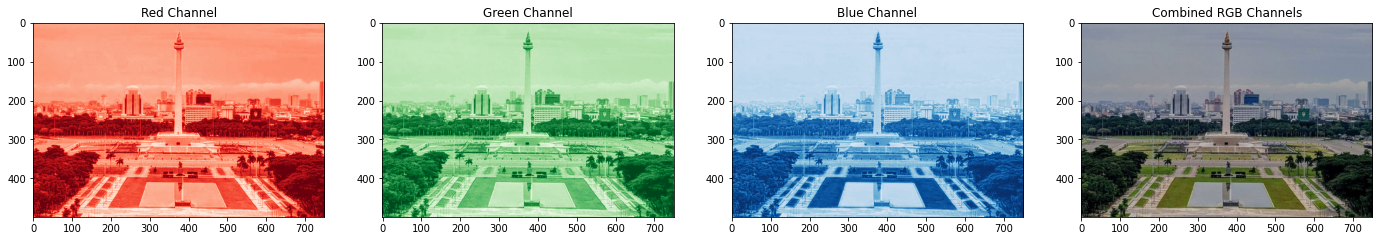

In [26]:
red_image = np.array(image)[:, :, 0]
green_image = np.array(image)[:, :, 1]
blue_image = np.array(image)[:, :, 2]

order = 500
red_comp = svd_compressor(red_image, order)
green_comp = svd_compressor(green_image, order)
blue_comp = svd_compressor(blue_image, order)

color_comp = np.zeros((np.array(image).shape[0], np.array(image).shape[1], 3))
color_comp[:, :, 0] = red_comp
color_comp[:, :, 1] = green_comp
color_comp[:, :, 2] = blue_comp
color_comp = np.around(color_comp).astype(int)

plt.figure(figsize=(24, 8))
plt.subplot(141)
plt.imshow(red_comp, cmap='Reds_r')
plt.title("Red Channel")
plt.subplot(142)
plt.imshow(green_comp, cmap='Greens_r')
plt.title("Green Channel")
plt.subplot(143)
plt.imshow(blue_comp, cmap='Blues_r')
plt.title("Blue Channel")
plt.subplot(144)
plt.imshow(color_comp)
plt.title("Combined RGB Channels")
plt.show()

100%|██████████| 8/8 [00:08<00:00,  1.10s/it]


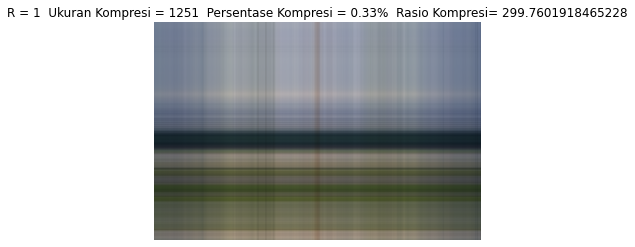

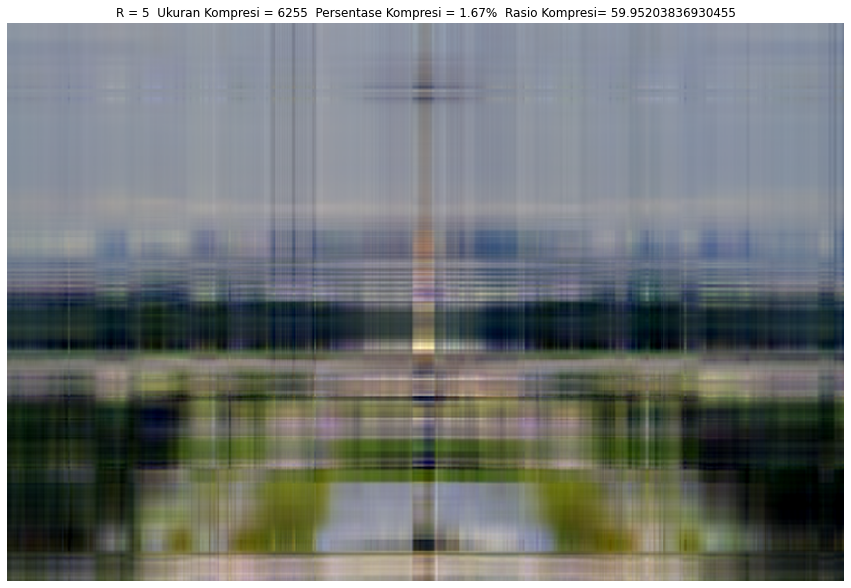

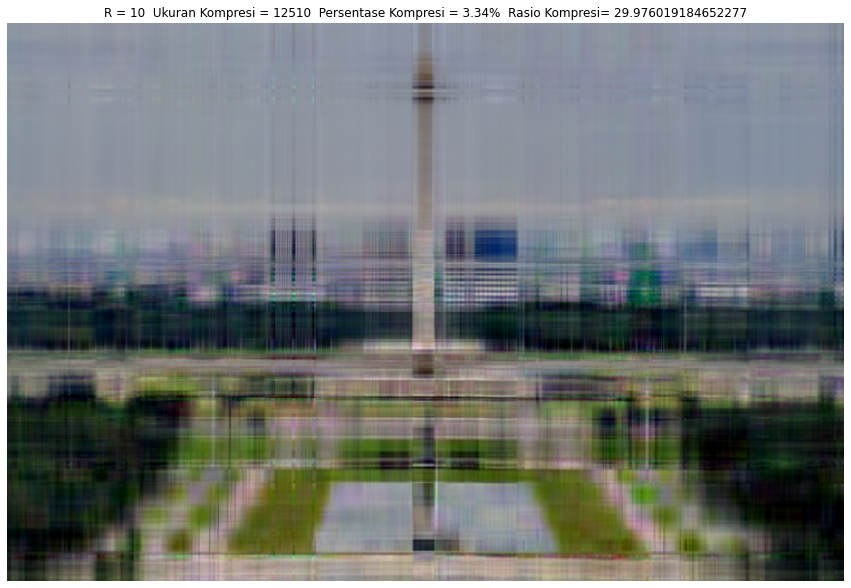

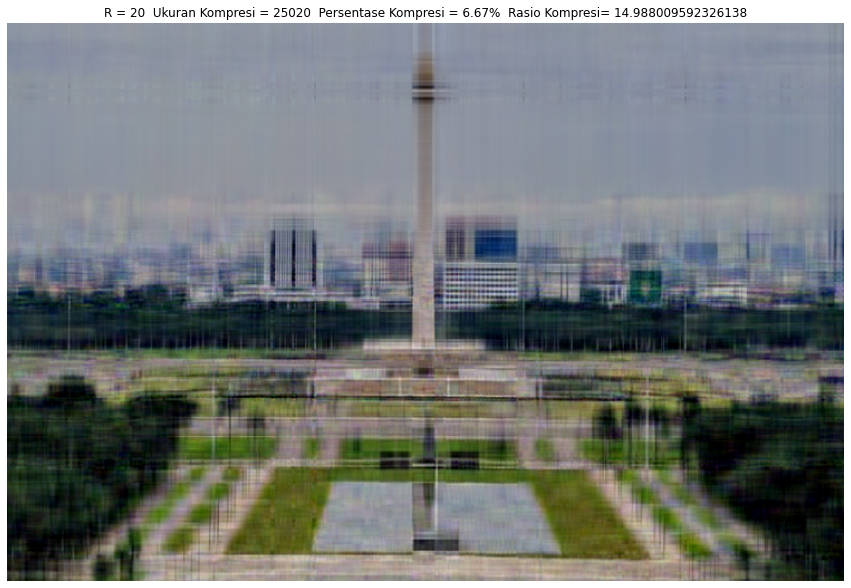

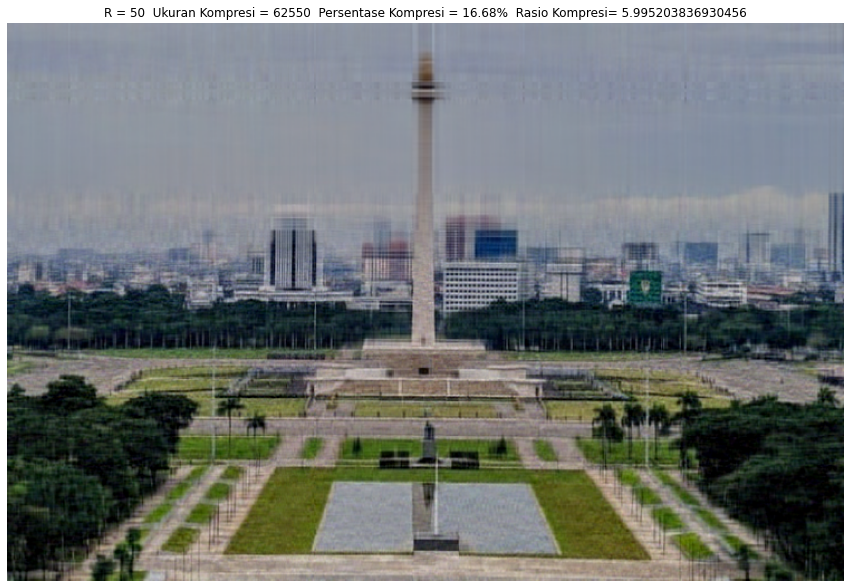

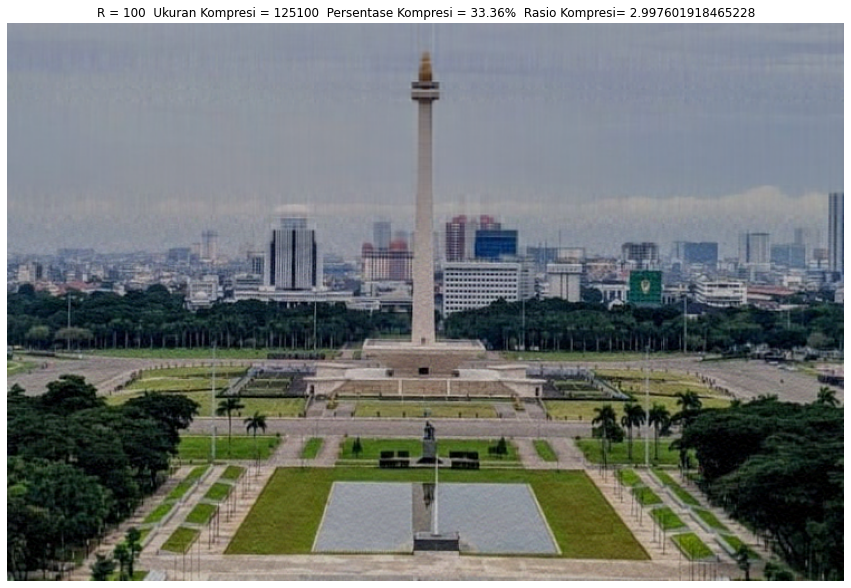

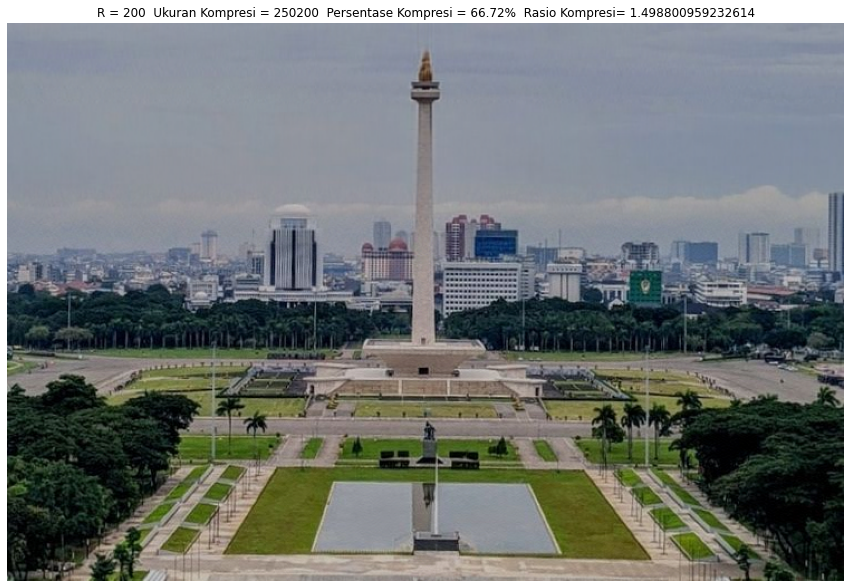

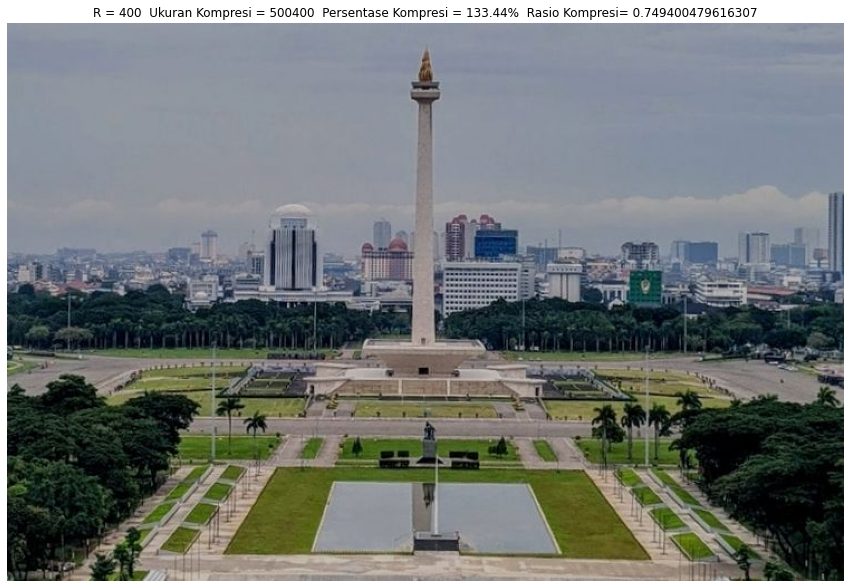

<Figure size 1080x1080 with 0 Axes>

In [55]:

orders = [1, 5, 10, 20, 50, 100, 200, 400]

S = np.diag(S)

j = 0
for i in tqdm(range(len(orders))):
    
    order = orders[i]
    red_comp = svd_compressor(red_image, order)
    green_comp = svd_compressor(green_image, order)
    blue_comp = svd_compressor(blue_image, order)
    
    color_comp = np.zeros((np.array(image).shape[0], np.array(image).shape[1], 3))
    color_comp[:, :, 0] = red_comp
    color_comp[:, :, 1] = green_comp
    color_comp[:, :, 2] = blue_comp
    color_comp = np.around(color_comp).astype(int)
    

    uk = width * order + order + order * height
    rk = totpix / uk
    pk = uk / totpix * 100

    plt.title("R = {}".format(order) + '  Ukuran Kompresi = ' + str(uk) + '  Persentase Kompresi = ' + ("%.2f%%" % (pk)) + '  Rasio Kompresi= ' + str(rk))
    plt.imshow(color_comp)
    plt.axis('off')

    plt.figure(figsize=(15, 15))
    j += 1